In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/bike_sharing.csv')
df = pd.DataFrame(data)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
num_cols = []
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
    num_cols.append(i)
print(num_cols)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


For numerical variables.

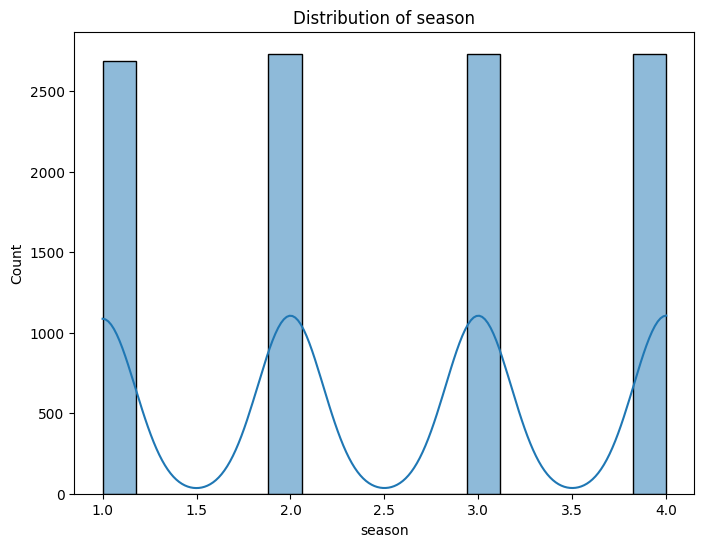

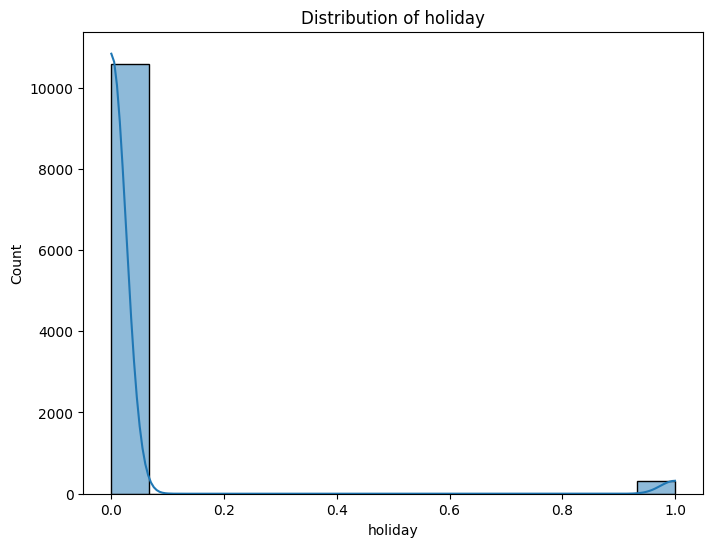

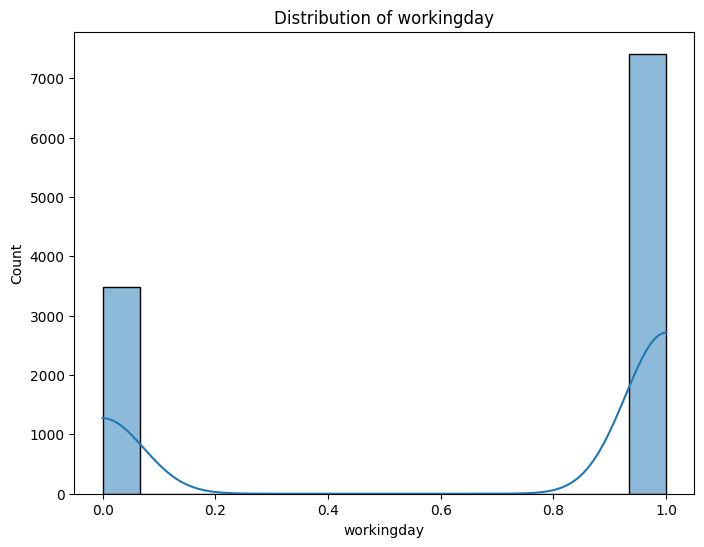

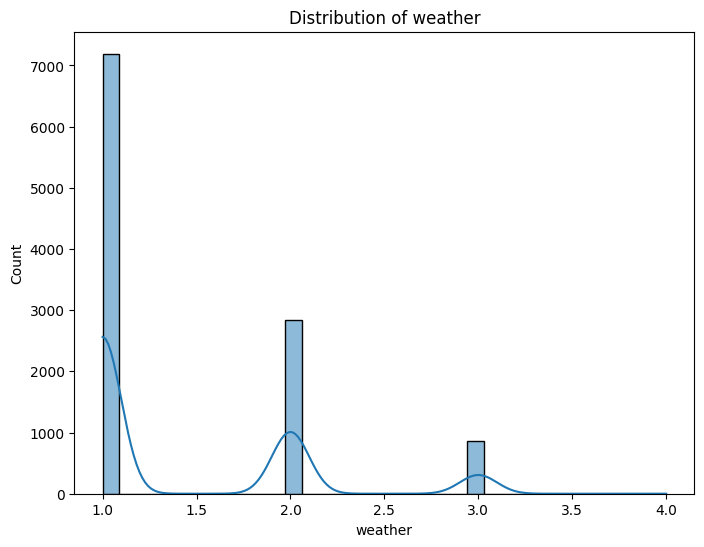

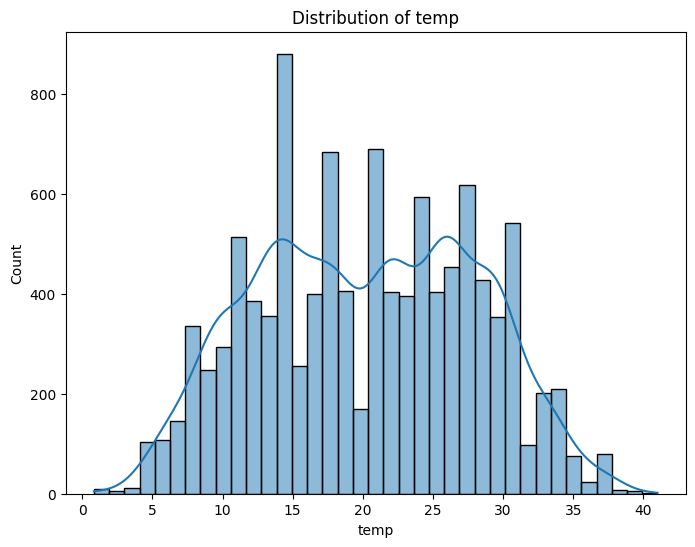

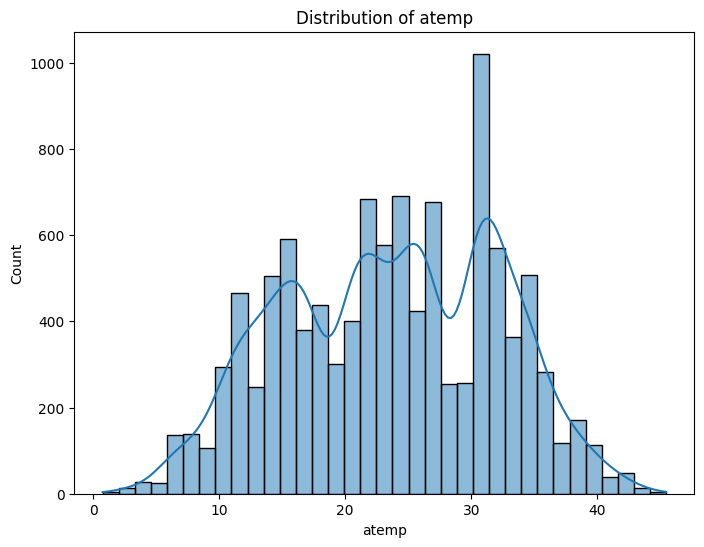

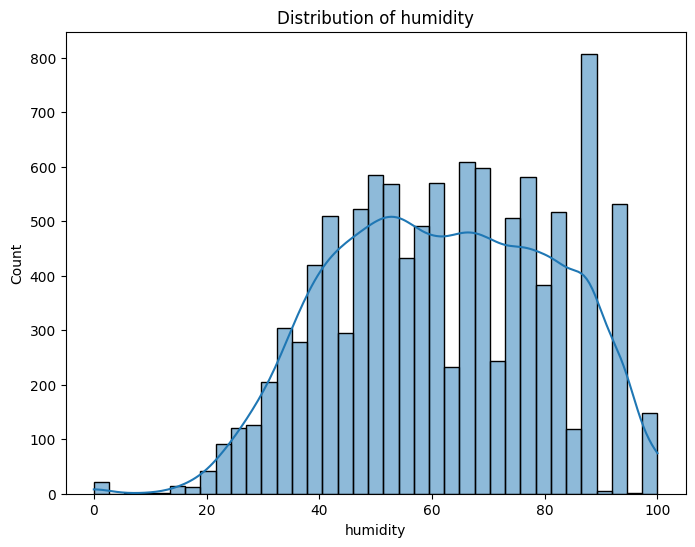

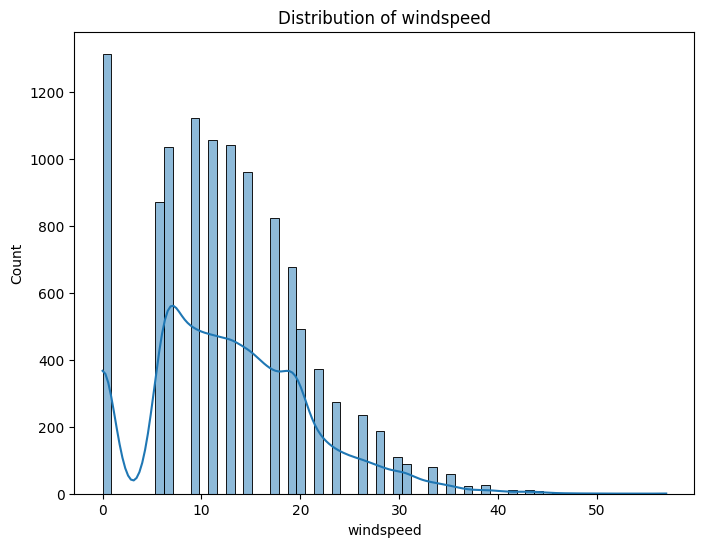

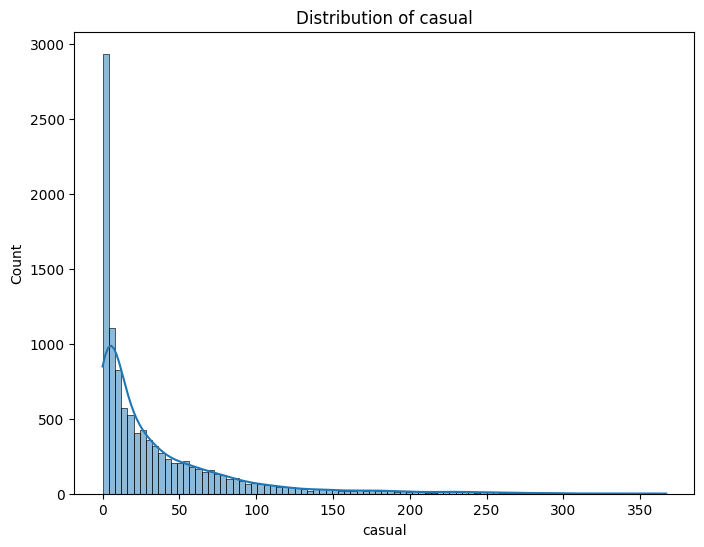

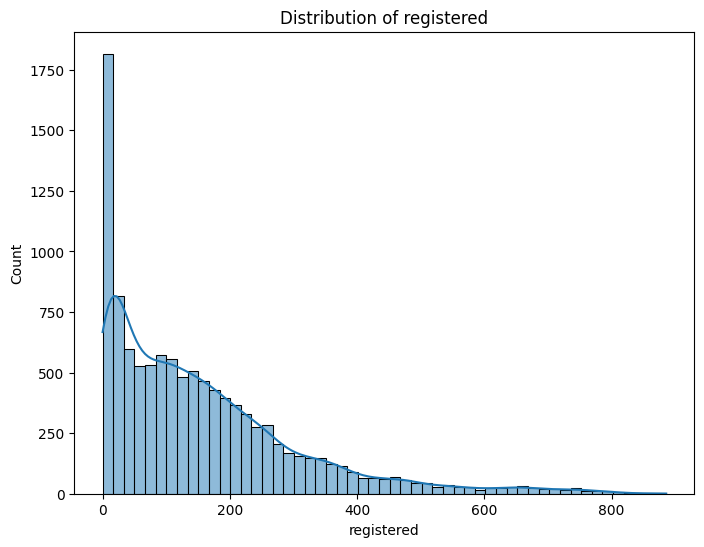

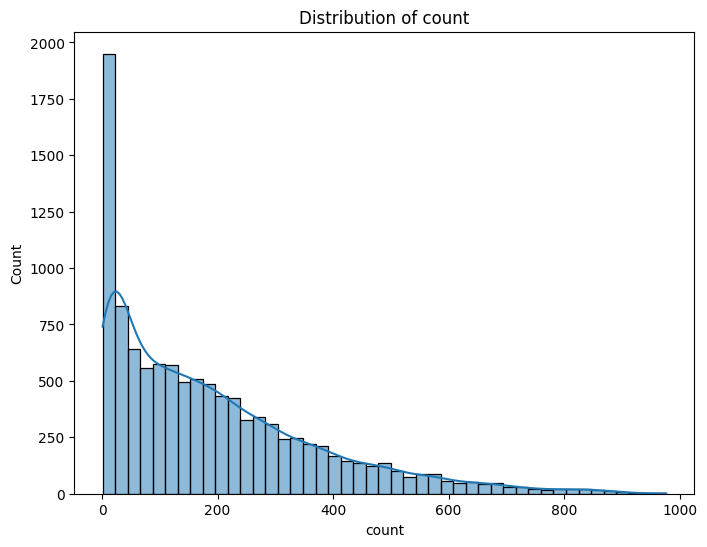

In [13]:
for i in num_cols:
  plt.figure(figsize = (8,6))
  sns.histplot(df[i],kde=True)
  plt.title(f'Distribution of {i}')
  plt.show()

For categorical variables.

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [15]:
df['datetime'].nunique()
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

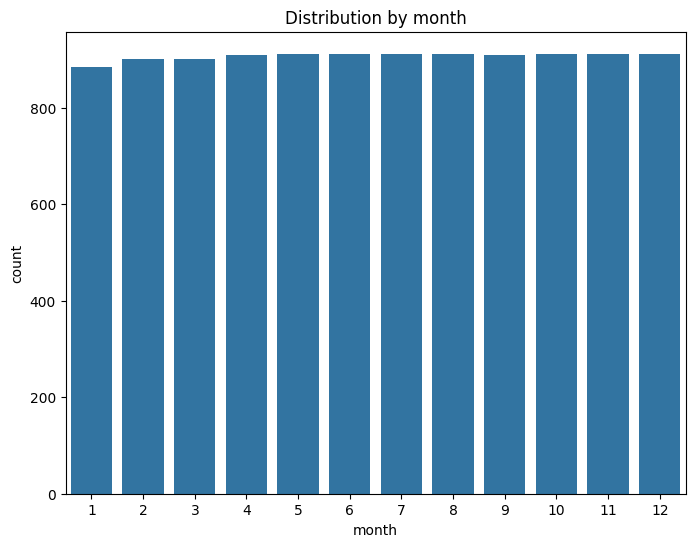

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data = df , x = 'month')
plt.title("Distribution by month")
plt.show()

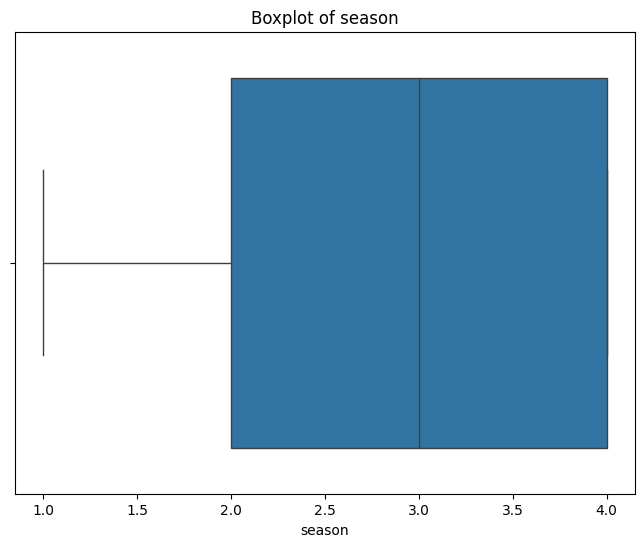

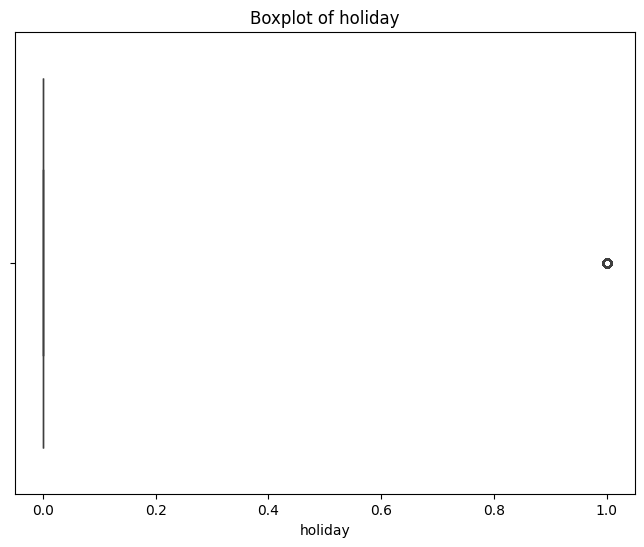

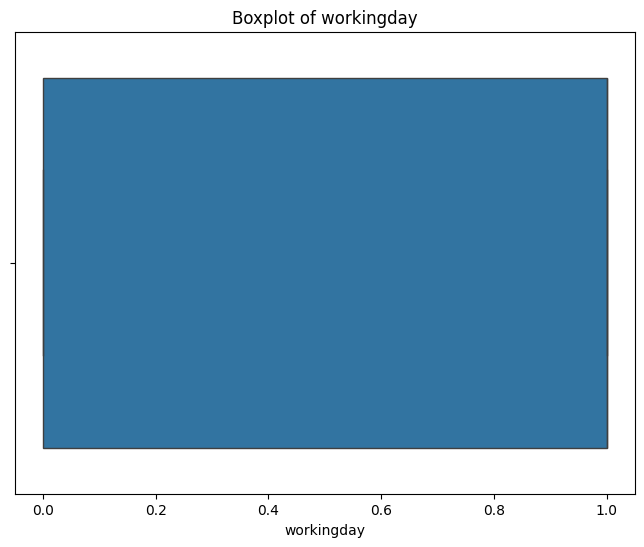

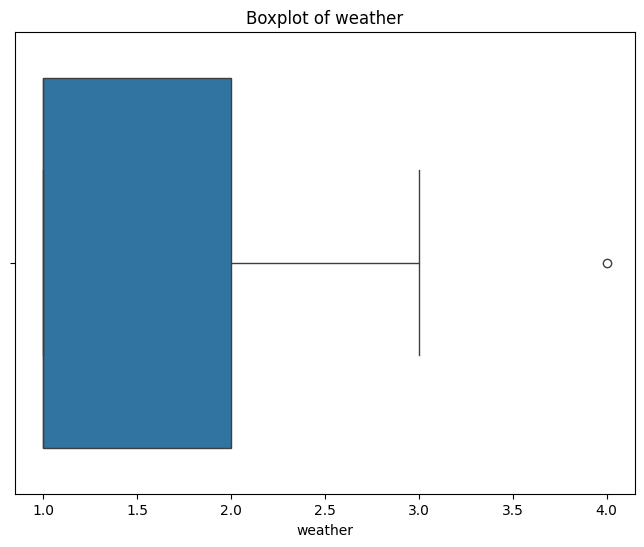

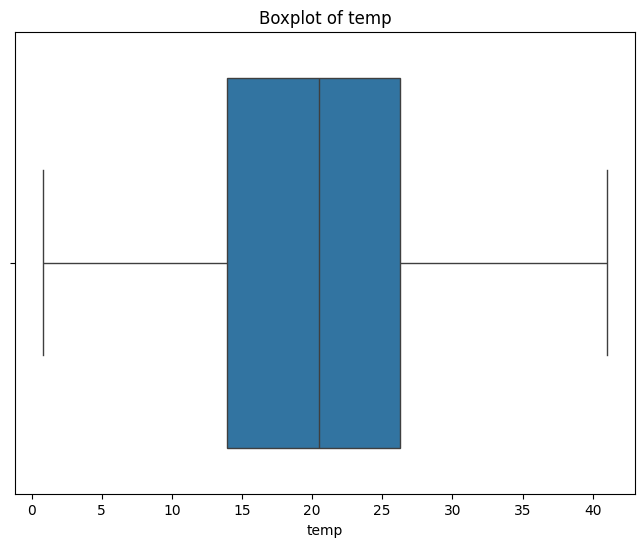

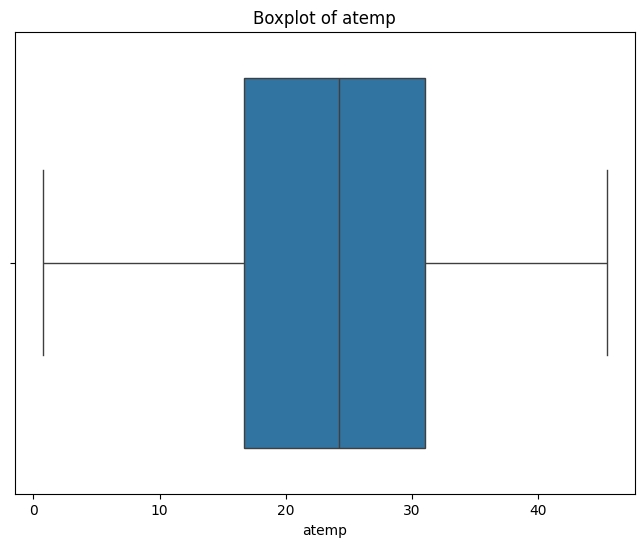

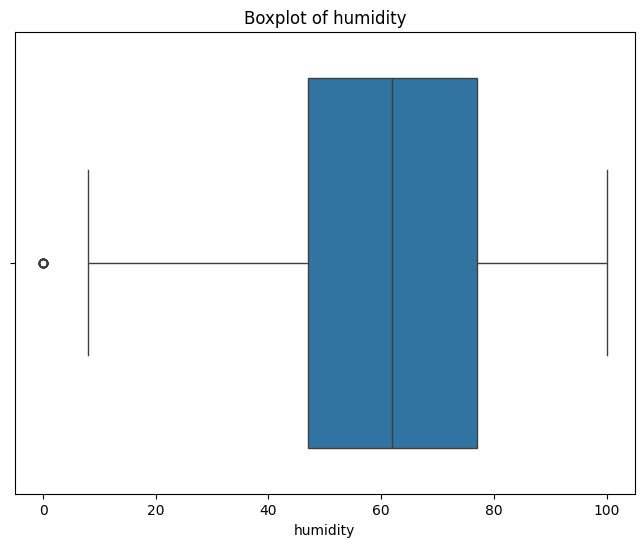

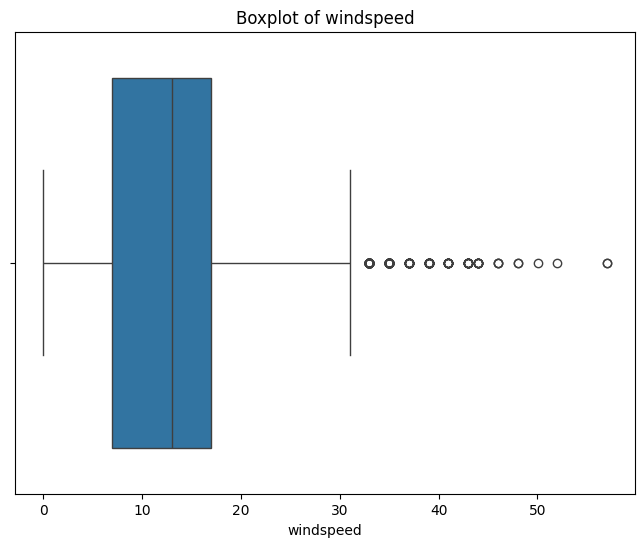

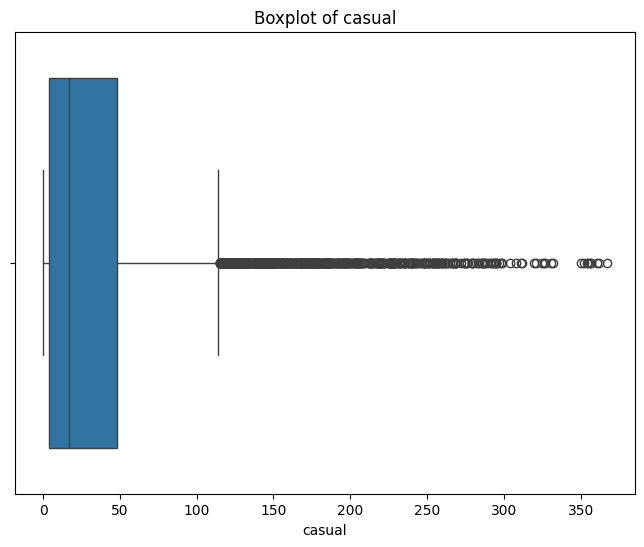

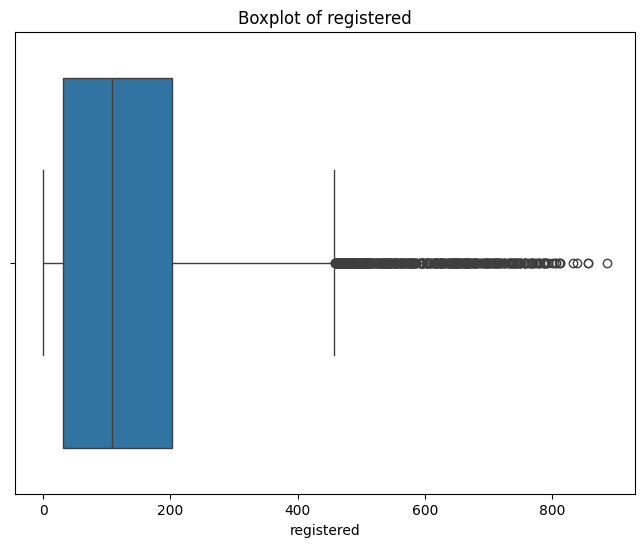

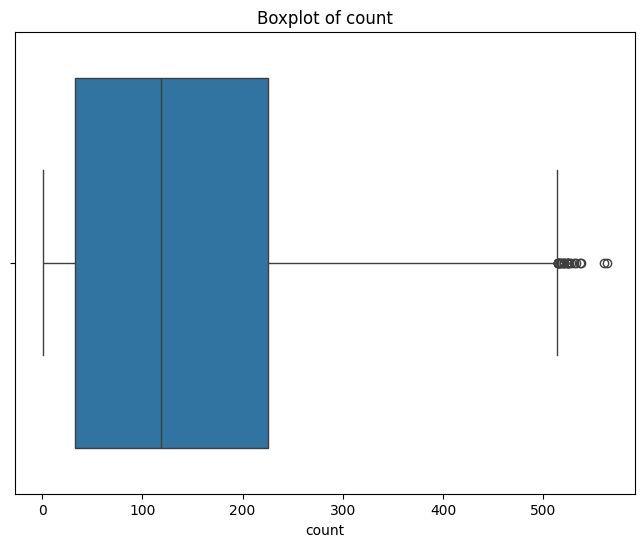

In [17]:
# Numerical variables
for feature in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

    # Identify and deal with outliers using IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Remove outliers
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]

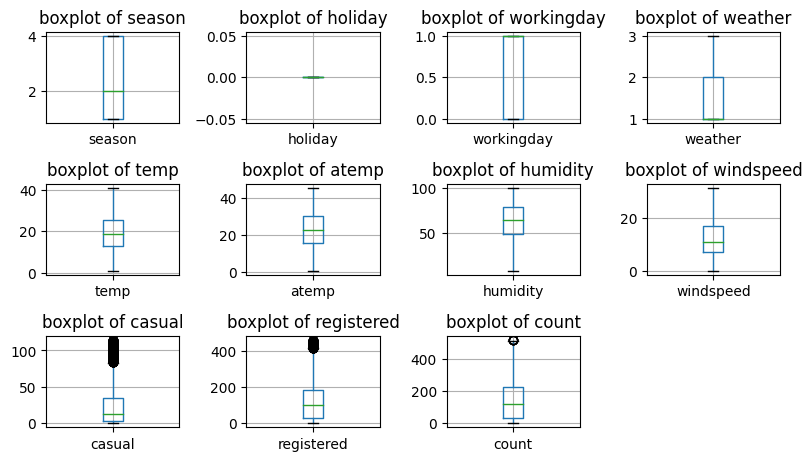

In [18]:
plt.figure(figsize=(8,6))
for i,column in enumerate(num_cols,start=1):
  plt.subplot(4,4,i)
  df.boxplot(column=column)
  plt.title(f'boxplot of {column}')

plt.tight_layout()
plt.show()

In [19]:
df.shape

(9089, 14)

In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
season,1.000000,NaN,0.002736,0.016743,0.261152,0.265125,0.187859,-0.123545,0.121750,0.163446,0.166762,-0.008167,0.973221
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,0.002736,NaN,1.000000,0.012602,0.109680,0.102833,-0.079716,0.037528,-0.110689,0.174899,0.127000,-0.005628,0.001723
weather,0.016743,NaN,0.012602,1.000000,-0.031159,-0.033534,0.429214,0.011439,-0.123403,-0.085335,-0.099841,0.008610,0.016533
temp,0.261152,NaN,0.109680,-0.031159,1.000000,0.986618,-0.010929,-0.016327,0.509566,0.263107,0.335394,0.044534,0.256952
atemp,0.265125,NaN,0.102833,-0.033534,0.986618,1.000000,0.005527,-0.057271,0.503991,0.261222,0.332581,0.042460,0.261340
humidity,0.187859,NaN,-0.079716,0.429214,-0.010929,0.005527,1.000000,-0.294758,-0.334710,-0.265369,-0.300010,-0.064588,0.200635
windspeed,-0.123545,NaN,0.037528,0.011439,-0.016327,-0.057271,-0.294758,1.000000,0.107200,0.103500,0.112027,-0.029550,-0.124636
casual,0.121750,NaN,-0.110689,-0.123403,0.509566,0.503991,-0.334710,0.107200,1.000000,0.578267,0.711535,0.108650,0.115467
registered,0.163446,NaN,0.174899,-0.085335,0.263107,0.261222,-0.265369,0.103500,0.578267,1.000000,0.984713,0.171467,0.169274


<ipython-input-156-626b7e210274>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
<ipython-input-156-626b7e210274>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')


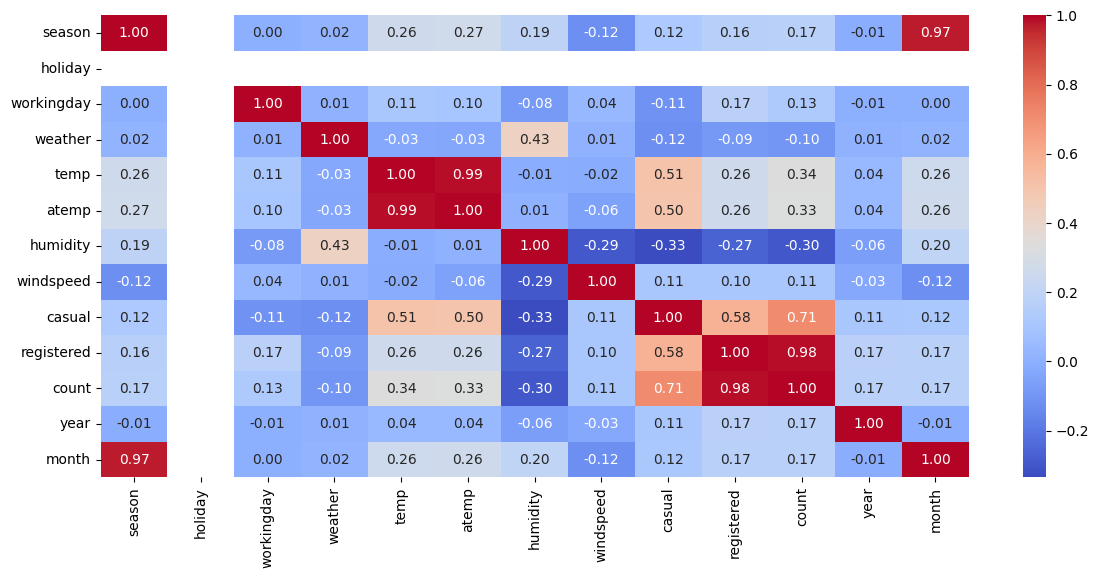

In [156]:
df.corr()['count']
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')
plt.show()

In [106]:
df['workingday'].value_counts()

1    6628
0    2461
Name: workingday, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

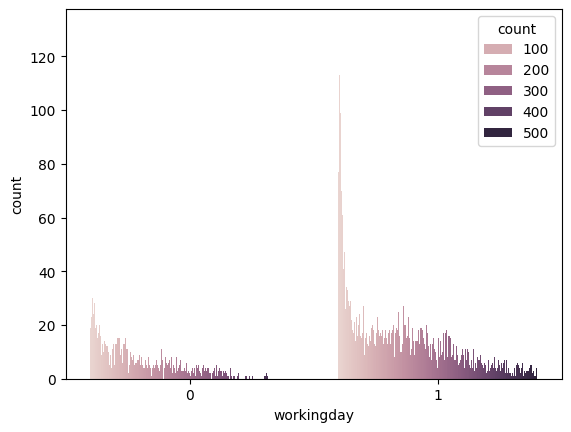

In [100]:
sns.countplot(data = df, x = 'workingday', hue = 'count')

Hypothesis Testing:

H0 : There is no significant difference between number of rides on weekdays and weekends.

H1 : There is a significant difference between number of rides on weekdays and weekends.

In [23]:
wkn = df[df['workingday']==0]['count'].values
wkd = df[df['workingday']==1]['count'].values

In [94]:
df[df['workingday']==0]['casual'].sum()

68860

In [96]:
df[df['workingday']==0]['registered'].sum()

221847

In [99]:
df[df['workingday']==1]['casual'].sum()

142153

In [97]:
df[df['workingday']==1]['registered'].sum()

873488

In [24]:
from scipy.stats import ttest_ind

In [107]:
ttest_ind(wkn,wkd,alternative='two-sided')

TtestResult(statistic=-12.205234749740082, pvalue=5.375190338688469e-34, df=9087.0)

p-value ~ 0,

alpha = 0.05

Since, p-value < alpha.

We reject null hypothesis.

Hence, There is a significant difference between number of rides on weekdays and weekends.

Insights and recommendations:

1. Number of rides in weekdays is greater than weekends.
2. Number of casual rides in weekdays are greater than in weekends.
3. Number of registered rides in weekdays are gretaer than in weekends.
4. Since, The overall rides in weekends is less, more attention is required in that area.

It may be caused to the fact that weekends are usually holidays, so people might prefer to stay home.

● weather:

o 1: Clear, Few clouds, partly cloudy

o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds

o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

In [108]:
cl = df[df['weather']==1]['count'].values
mi = df[df['weather']==2]['count'].values
li = df[df['weather']==3]['count'].values
he = df[df['weather']==4]['count'].values

In [115]:
cl.sum()

883130

In [116]:
mi.sum()

347541

In [117]:
li.sum()

75677

In [118]:
he.sum()

0

<Axes: ylabel='Count'>

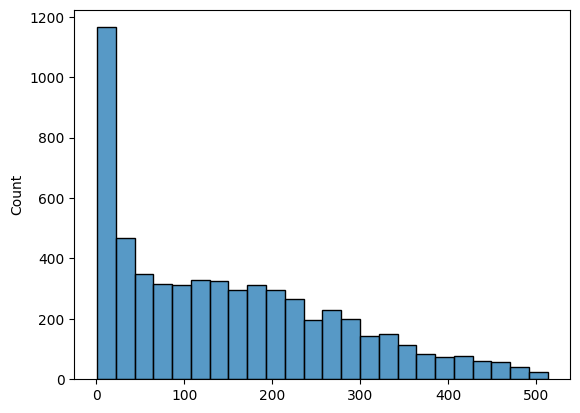

In [119]:
sns.histplot(cl)

<Axes: ylabel='Count'>

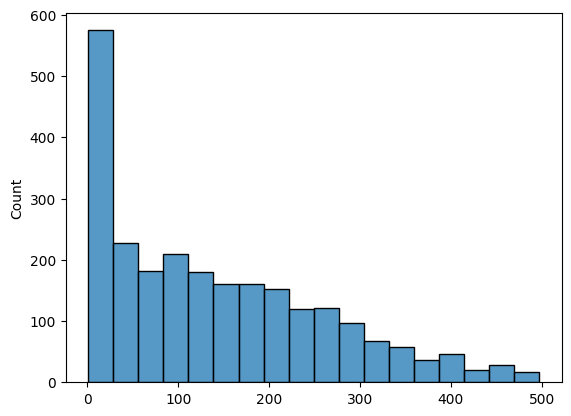

In [120]:
sns.histplot(mi)

<Axes: ylabel='Count'>

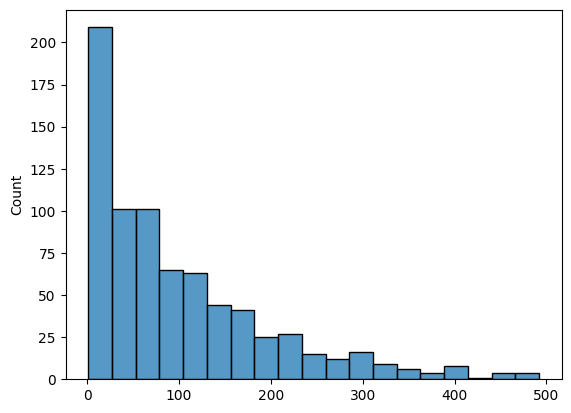

In [121]:
sns.histplot(li)

<Axes: >

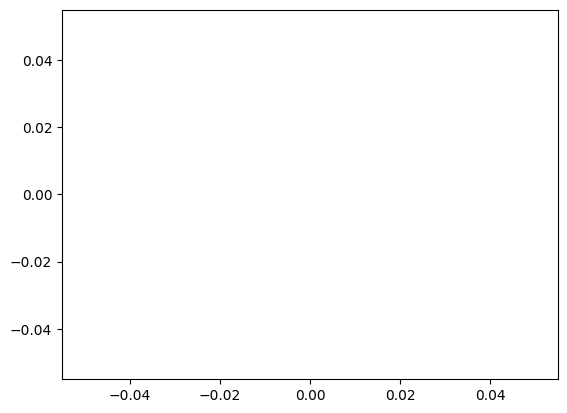

In [122]:
sns.histplot(he)

Since, heavy rain + ice pallets i.e he has zero cases,hence we ignore while testing. (he = 0)

To check if there is equality in variance, we use levene test.

In [123]:
from scipy.stats import levene
levene(cl,mi,li)

LeveneResult(statistic=59.53973893688664, pvalue=2.042666953939915e-26)

P-value ~ 0,
alpha = 0.05
Since pvalue < alpha,
we will reject h0 i.e these series do not have equal variance.

To check if there is normal distribution of values, we use shapiro wilk test.

In [36]:
from scipy.stats import shapiro
shapiro(cl)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9221206903457642, pvalue=0.0)

In [124]:
shapiro(mi)

ShapiroResult(statistic=0.9176433086395264, pvalue=1.1781027085019149e-34)

In [125]:
shapiro(li)

ShapiroResult(statistic=0.8506645560264587, pvalue=4.354889679089085e-26)

Since, in all three values in the series has p-value ~ 0.
where , alpha = 0.05
i.e p-value < alpha.
Hence there is no normal distribution among the values.

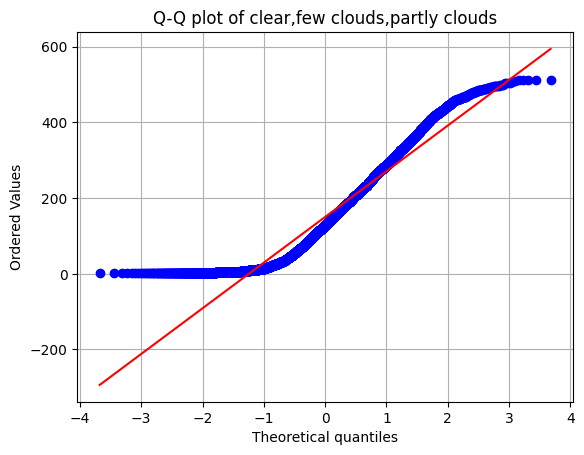

In [126]:
import scipy.stats as stats
stats.probplot(cl, dist = 'norm', plot = plt)
plt.title('Q-Q plot of clear,few clouds,partly clouds')
plt.grid(True)
plt.show()

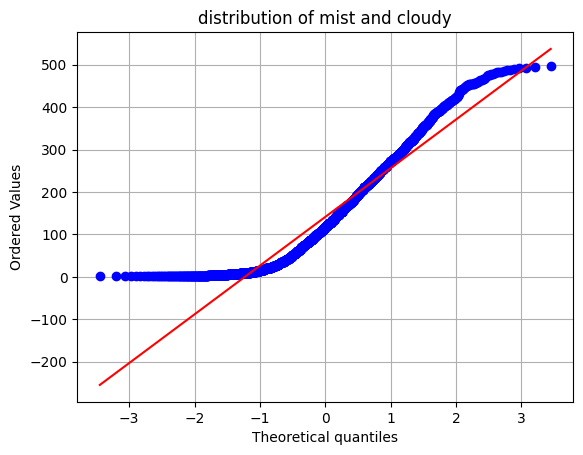

In [127]:
stats.probplot(mi,dist='norm',plot=plt)
plt.title('distribution of mist and cloudy')
plt.grid(True)
plt.show()

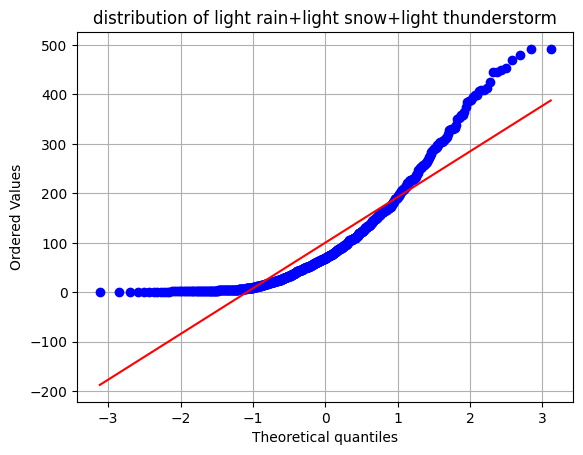

In [128]:
stats.probplot(li,dist='norm',plot=plt)
plt.title('distribution of light rain+light snow+light thunderstorm')
plt.grid(True)
plt.show()

Since, from the above observations we can conclude that the data does not follow normal distribution nor has equal variance, So we cannot perform One-way Annova test.

Instead we perform kruskal walis test to check if the data has the same median or not.

In [42]:
from scipy.stats  import kruskal

H0 : The demand of bicycles on rent is same for different weather conditions.

Ha : The demand of bicycles on rent is not same for different weather conditions.

In [129]:
kruskal(cl,mi,li)

KruskalResult(statistic=105.84880932608628, pvalue=1.0356740552188787e-23)

Since, P-value ~ 0
also alpha =0.05
i.e p-value < alpha
that means we reject H0.
So, the demand of bicycles is not same on different weather conditions.

Insight and Recommendation:

1.The count of renting bicycle is high, when the weather is clear, cloudy and partly cloudy.

2.The count of renting of cycle is zero, when the weather is heavy rain,thunderstorm and ice palettes. So running the service during this weather is useless, instead the focus should be shifted on other weather conditions.

3.The count of renting cycle when the weather is light snow,light rain, thunderstorm is significantly lesser compared to other weather conditions.
So we can conclude that the eletric cycles are preferred at better weather conditions.

season: season (1: spring, 2: summer, 3: fall, 4: winter)

In [44]:
df['season'].nunique()

4

In [130]:
spr = df[df['season']==1]['count'].values
sum = df[df['season']==2]['count'].values
fall = df[df['season']==3]['count'].values
win = df[df['season']==4]['count'].values

In [132]:
spr.sum()

240908

In [133]:
sum.sum()

334702

In [134]:
fall.sum()

363258

In [135]:
win.sum()

367480

<Axes: ylabel='Count'>

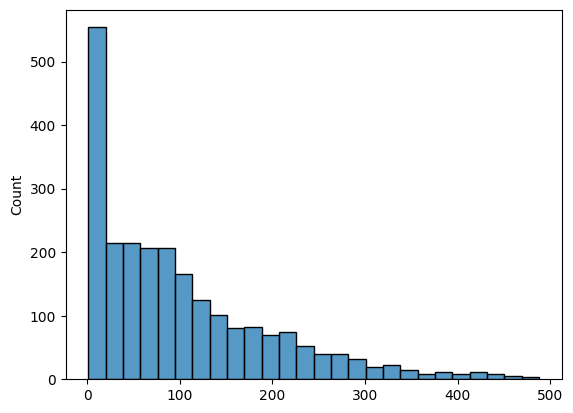

In [136]:
sns.histplot(spr)

<Axes: ylabel='Count'>

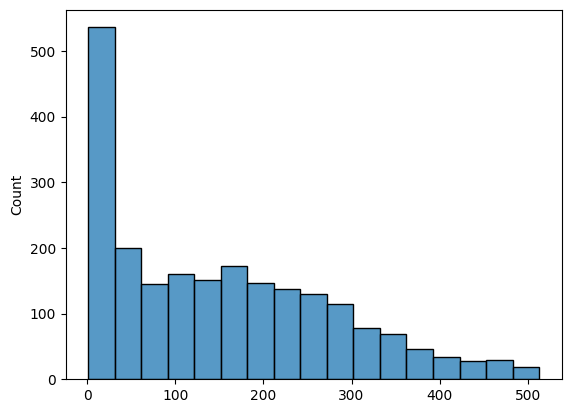

In [137]:
sns.histplot(sum)

<Axes: ylabel='Count'>

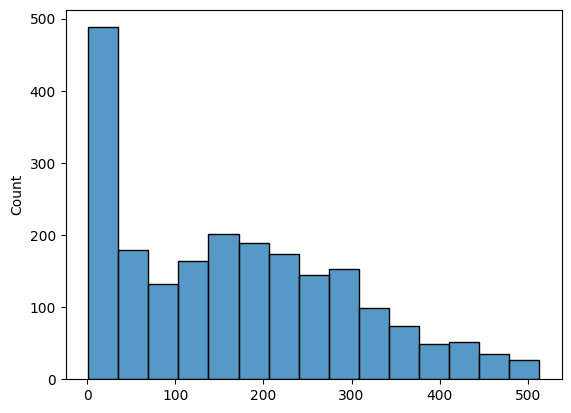

In [138]:
sns.histplot(fall)

<Axes: ylabel='Count'>

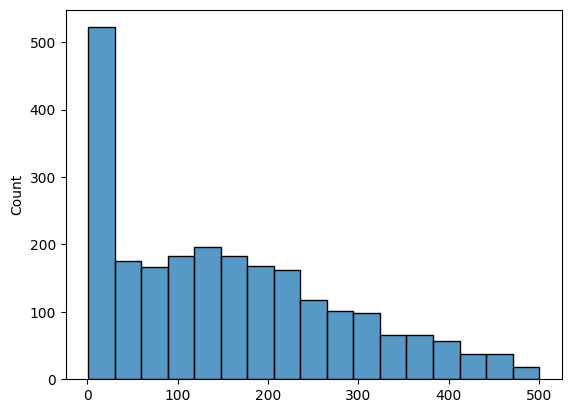

In [139]:
sns.histplot(win)

To check if the data follows normal distribution or not, we use shapiro test

In [140]:
shapiro(spr)

ShapiroResult(statistic=0.8720636367797852, pvalue=2.099873774760025e-40)

In [141]:
shapiro(sum)

ShapiroResult(statistic=0.9223816394805908, pvalue=3.047296012963622e-32)

In [142]:
shapiro(fall)

ShapiroResult(statistic=0.9384109377861023, pvalue=4.697499014315342e-29)

In [143]:
shapiro(win)

ShapiroResult(statistic=0.9307991862297058, pvalue=1.05722492545018e-31)

Since, all the p-values ~ 0,
Also alpha = 0.05,
i.e p-value < alpha,
we reject H0, Hence the data does not follow normal distribution.

To further prove the point, we use a q-q plot, to check if the actual values in the data match the theoritical values.

In [58]:
from statsmodels.graphics.gofplots import qqplot

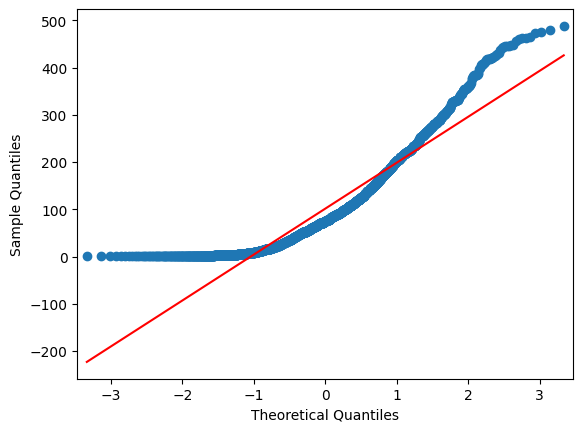

In [144]:
qqplot(spr,line='s')
plt.show()

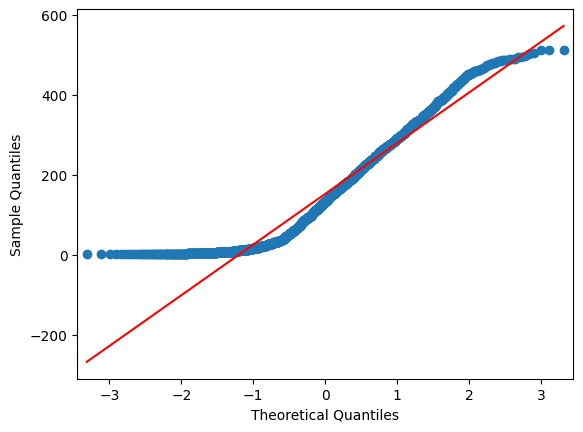

In [145]:
qqplot(sum,line='s')
plt.show()

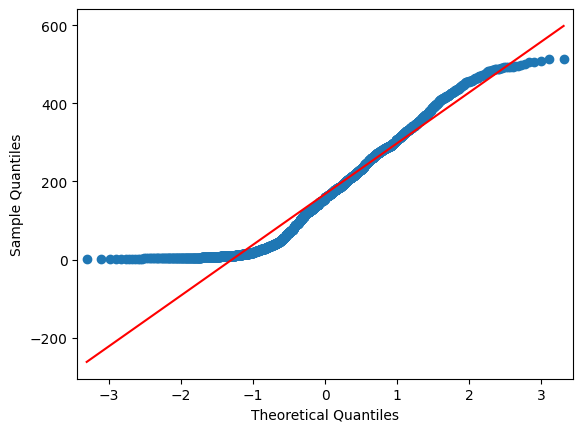

In [146]:
qqplot(fall,line='s')
plt.show()

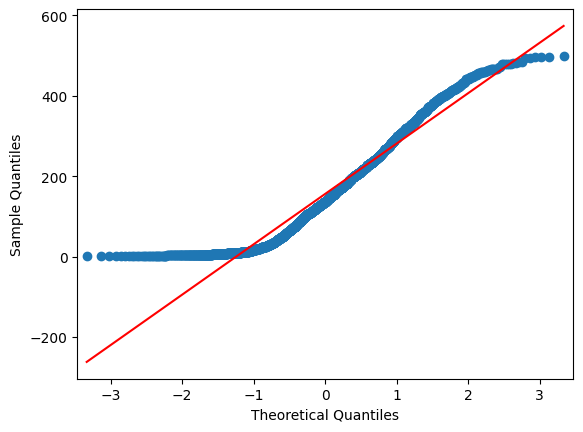

In [147]:
qqplot(win,line='s')
plt.show()

To check if the data follows equal variance, we check by using levene test.

In [148]:
levene(spr,sum,fall,win)

LeveneResult(statistic=124.41817087186855, pvalue=5.622706465240217e-79)

Since, p-value ~ 0
also, alpha = 0.05
i.e p-value< alpha means we reject H0.
The data does not follow equal variances.

Since, the data does not follow normal distribution or equal variances, Hence we follow kruskal walis test.

HO : The demand of bicycles on rent is same for different seasons.

Ha : The demand of bicycles on rent is not same for different seasons.

In [149]:
kruskal(spr,sum,fall,win)

KruskalResult(statistic=382.95888376456264, pvalue=1.0868779284193367e-82)

Since, p-value ~ 0.
also alpha = 0.05.
i.e  p-value < alpha , we reject H0.
The data does not follow same median across the distribution.

From following tests, we can conclude that the demand of bicycles on rent is not same for different seasons.




Insights and Recommendation:

1. The count of cycles being rented in winter season is highest, closely followed by during the fall season.

2.The count of cycles being rented in spring season is the least. More focus is required in that season.

It might be due to the scorching heat in the spring, people prefer to use a 4-wheeler than a cycle.

In [68]:
pd.crosstab(df['weather'],df['season'],margins = True)

season,1,2,3,4,All
weather,,,,,
1,1541,1392,1520,1422,5875
2,657,604,472,726,2459
3,178,202,169,206,755
All,2376,2198,2161,2354,9089


In [69]:
we_123 = [[1541,1392,1520,1422],[657,604,472,726],[178,202,169,206]]

In [70]:
from scipy.stats import chi2_contingency

H0 : Weather conditions during different seasons are not different.

Ha : Weather conditons during different seasons are significantly different.

In [71]:
chi2_contingency(we_123)

Chi2ContingencyResult(statistic=57.75760284613353, pvalue=1.2831530070740874e-10, dof=6, expected_freq=array([[1535.81252063, 1420.75585873, 1396.83958631, 1521.59203433],
       [ 642.81923204,  594.661899  ,  584.65166685,  636.86720211],
       [ 197.36824733,  182.58224227,  179.50874684,  195.54076356]]))

  Chi^2 statistic : 57.757
  p-value = 1.28 e^-10 ~ 0
  alpha =0.05
  Since, p-value is less than alpha.
  we reject H0.
  That means the data is independent of each other.

From the above the chi square test of independence, we can conclude that weather conditions are significantly different during different seasons.

Insights and Recommendations:

1. The count of cycles rented is highest when it is spring season and has a clear weather during the day.
2. The count of cycles is lowest when it is fall season and weather is light snow,light rain.
3. It is needed to concentrate on cloudy weather as it is significantly lower compared to clear weather.